# Spacy basic NLP tasks

In this tutorial, we introduce basic NLP tasks that are associated with Spacy. Spacy is selected as it is an industrial-grade NLP library that is known to be fastest and most accurate in the industry and research. 

The reference for this tutorial is from https://spacy.io/usage/. Some of the material is obtained from the spacy notebooks therein.

The Spacy library is described as 4 sections - usage, models, api and universe. The set-up instructions are in the usage, while the model section looks into the models for tagging, parsing and entity recognition. There are no inherent models to do training for sentiment etc, which still need to call on libraries like sci-kit learn. 

## Architecture
The Spacy library is useful as a building block to build NLP libraries - a valuable skillset. To do so, a basic understanding of its architecture is necessary. A pictorial of it below. Spacy comes with models for its 'Language' models - which are used to build the 'Vocab' that is particular to your use case. Further, the 'Doc' as represented below are your own training or test documents. The Doc is broken into tokens (words or groups of words), span (a subset of documents) or lexeme (refers to the root words of words).

/Users/liming/projects/sentiment/Day1


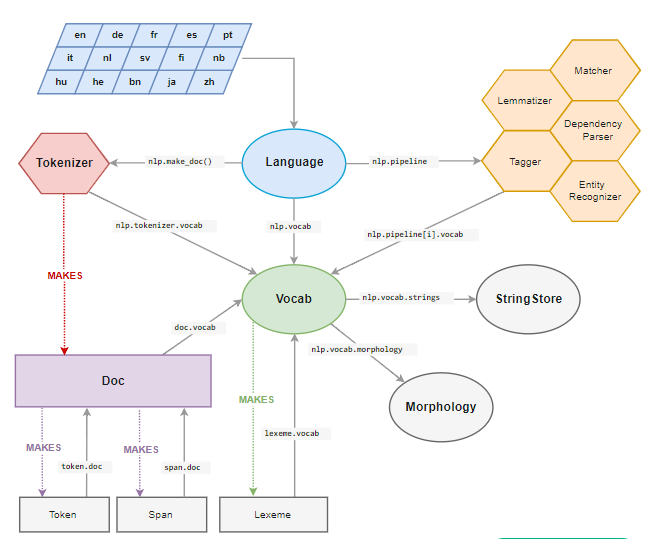

In [1]:
from os import chdir, getcwd
fpath = getcwd()
print (fpath)
from IPython.display import Image
Image(filename=fpath + '/images/architecture.PNG', width=550, height=400)

In [3]:
# this is to make sure we get no unicode based errors
from __future__ import unicode_literals
import spacy
import numpy as np
print (spacy.__version__)

2.2.4


In [3]:
# !pip install spacy_wordnet

Processing /Users/liming/Library/Caches/pip/wheels/78/65/76/5a98dae47d1e1ac05010b1da0e935cc3573675cad15713963d/spacy_wordnet-0.0.4-py2.py3-none-any.whl
Processing /Users/liming/Library/Caches/pip/wheels/9b/fd/0c/d92302c876e5de87ebd7fc0979d82edb93e2d8d768bf71fac4/nltk-3.3-py3-none-any.whl
  Attempting uninstall: nltk
    Found existing installation: nltk 3.5
    Uninstalling nltk-3.5:
      Successfully uninstalled nltk-3.5


## Containers in Spacy
There are 4 key containers in spacy - 
1. Tokens - they are simplest and contain many useful different properties.
2. doc - this is a sequence of tokens
3. span - this is a slice from a doc object 
4. lexme - an entry in the vocabulary

First we load the spacy Language model (English). In order to process sentences, we need to use the model 'nlp', which does parsing, POS, NER on the sentence on each of the tokens. We explore the properites of these tokens.

## Tokens

A token is a single chopped up element of the sentence, which could be a word or a group of words to analyse. The task of chopping the sentence up is called "tokenisation".

Example: The following sentence can be tokenised by splitting up the sentence into individual words.

	"Cytora is going to PyCon!"
	["Cytora","is","going","to","PyCon!"]

In [36]:
!python -m spacy download en_core_web_sm # small model
#!python -m spacy download en_core_web_md # medium model
#!python -m spacy download en_core_web_lg # large model

     |████████████████████████████████| 827.9 MB 2.1 MB/s eta 0:00:012    |██▌                             | 64.8 MB 10.2 MB/s eta 0:01:15     |████████▌                       | 220.9 MB 7.9 MB/s eta 0:01:17     |█████████████████████████▎      | 655.1 MB 8.4 MB/s eta 0:00:21     |██████████████████████████████▉ | 797.6 MB 5.9 MB/s eta 0:00:06
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-py3-none-any.whl size=829180943 sha256=e6af7dbc8a74495bb688375a83a7f5c09396db4fd6a783f797d1cb2f3d4ed4d1
  Stored in directory: /private/var/folders/4n/w48y5jx53md5fkvxvrmlhhrh0000gn/T/pip-ephem-wheel-cache-jxp3qvnb/wheels/11/95/ba/2c36cc368c0bd339b44a791c2c1881a1fb714b78c29a4cb8f5
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [37]:
# u need to run for the spacy models
# python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm') # small model
#nlp = spacy.load('en_core_web_lg') # large model
doc = nlp(u'How do you do, good morning. Hello world! Natural Language Processing 101 is f8unn')

# Get first token of the processed document
token = doc[0]
print(token)

# Print sentences (one sentence per line)
for sent in doc.sents:
    print(sent)

How
How do you do, good morning.
Hello world!
Natural Language Processing 101 is f8unn


In [8]:
print(token.orth)  # token uinque id. These are stored as hashes ID/
print(token.orth_)

16762307017182994292
How


### Token tags

A POS tag is a context sensitive description of what a word means in the context of the whole sentence.
More information about the kinds of speech tags which are used in Spacy can be [found here](https://spacy.io/api/annotation#section-pos-tagging).

Examples:

1. CARDINAL, Cardinal Number - 1,2,3
2. PROPN, Proper Noun, Singular - "Matic", "Andraz", "Cardiff"
3. INTJ, Interjection - "Uhhhhhhhhhhh"

The following are some tags associated with tokens:
- Text: The original word text.
- Lemma: The base form of the word.
- POS: The simple part-of-speech tag.
- Tag: The detailed part-of-speech tag.
- Dep: Syntactic dependency, i.e. the relation between tokens.
- Shape: The word shape – capitalization, punctuation, digits.
- is alpha: Is the token an alpha character?
- is stop: Is the token part of a stop list, i.e. the most common words of the language?

For more properties, refer to https://spacy.io/api/token

In [9]:
# For each token, print corresponding part of speech tag
for token in doc:
    print('{} - {}'.format(token, token.pos_), token.has_vector, token.vector_norm, token.is_oov)
    

How - ADV True 21.662033 True
do - AUX True 22.512033 True
you - PRON True 23.776812 True
do - AUX True 22.936707 True
, - PUNCT True 21.189518 True
good - ADJ True 18.660686 True
morning - NOUN True 18.236757 True
. - PUNCT True 21.094297 True
Hello - INTJ True 20.844994 True
world - NOUN True 21.635757 True
! - PUNCT True 21.138208 True
Natural - PROPN True 21.336561 True
Language - PROPN True 19.895866 True
Processing - PROPN True 21.82662 True
101 - NUM True 21.453056 True
is - AUX True 22.58001 True
f8unn - DET True 20.8398 True


In [11]:
from spacy.parts_of_speech import ADV

def is_adverb(token):
    return token.pos == spacy.parts_of_speech.ADV

NNS = nlp.vocab.strings['NNS']
NNPS = nlp.vocab.strings['NNPS']
def is_plural_noun(token):
    return token.tag == NNS or token.tag == NNPS
    
doc = nlp(u"Apples and orange are similar.")
for token in doc:
    print(token, token.pos_, token.tag_, is_adverb(token), is_plural_noun(token), token.sentiment)
# for more properties, refer to https://spacy.io/api/token

Apples NOUN NNS False True 0.0
and CCONJ CC False False 0.0
orange ADJ JJ False False 0.0
are AUX VBP False False 0.0
similar ADJ JJ False False 0.0
. PUNCT . False False 0.0


### Token unigram probability

In [12]:
# For every token in doc, print log-probability of the word, estimated from counts from the reference model Need to use a larger model to observe
for token in doc:
    print(token, ',', np.exp(token.prob))

Apples , 2.061153622438558e-09
and , 2.061153622438558e-09
orange , 2.061153622438558e-09
are , 2.061153622438558e-09
similar , 2.061153622438558e-09
. , 2.061153622438558e-09


## Doc object

From the doc, it is possible to obtain named entities, which is any real world object such as a person, location, organisation or product with a proper name. The doc object also has noun chunks. Noun chunks are the phrases based upon nouns recovered from tokenized text using the speech tags.

Example:

	1. Barack Obama
	2. Edinburgh
	3. Ferrari Enzo

In [13]:
# Print all named entities with named entity types
doc_2 = nlp(u"Barack Obama lived in Washington and liked to eat Burger King.")  # ths create a doc object which has ents
for ent in doc_2.ents:
    print('{} - {}'.format(ent, ent.label_))
    
doc_3 = nlp(u"The boy loves to play football.") 
print([chunk for chunk in doc_3.noun_chunks])

Washington - GPE
Burger King - ORG
[The boy, football]


#### Export to numpy arrays

In [15]:
from spacy.attrs import ORTH, LIKE_URL, IS_OOV

attr_ids = [ORTH, LIKE_URL, IS_OOV]
doc_array = doc_2.to_array(attr_ids)
assert doc_array.shape == (len(doc_2), len(attr_ids))
assert doc_2[0].orth == doc_array[0, 0]
assert doc_2[1].orth == doc_array[1, 0]
assert doc_2[0].like_url == doc_array[0, 1]
assert list(doc_array[:, 1]) == [t.like_url for t in doc_2]
doc_array

array([[15388493565120789335,                    0,                    1],
       [ 4857242187112322394,                    0,                    1],
       [14271330622446930230,                    0,                    1],
       [ 3002984154512732771,                    0,                    1],
       [ 8812112232444892211,                    0,                    1],
       [ 2283656566040971221,                    0,                    1],
       [12289348328078726720,                    0,                    1],
       [ 3791531372978436496,                    0,                    1],
       [ 9837207709914848172,                    0,                    1],
       [ 3797589659457767034,                    0,                    1],
       [14826469074451677028,                    0,                    1],
       [12646065887601541794,                    0,                    1]],
      dtype=uint64)

## Vocabulary
A vocabulary is a collection of lexeme - which are the root of words. It is also possible to extract all words from the built-in vocabulary, but memory will overflow below. The vocabulary is useful in builing training data sets. Here we create a new vocabulary from some words. 

In [17]:
# Vocabulary from spacy model
apple = nlp.vocab.strings['apple']   # nlp is the language model
oov = nlp.vocab.strings['dskfodkfos']

print (apple)  # the words are identified as hashes in the vocabulary
print (oov)

apple_str = nlp.vocab.strings[apple]
print (apple_str)
assert oov not in nlp.vocab

# Create new vocabulary of two words
from spacy.vocab import Vocab
new_vocab = Vocab(strings=[u'hello', u'world'])   
for i in new_vocab:
    print(i.text, i.orth)

8566208034543834098
8566208034543834098
apple
hello 5983625672228268878
world 1703489418272052182


In [16]:
# printing out some of the stop words in the model vocabulary
from spacy.lang.en.stop_words import STOP_WORDS
print(STOP_WORDS) # <- set of Spacy's default stop words


{'hence', 'hundred', 'no', 'them', 'became', 'anyone', 'indeed', 'except', 'full', 'of', 'you', 'whence', 'toward', 'whereas', 'due', 'eleven', 'from', 'had', 'most', "'d", 'made', 'everything', 'hereafter', "'re", 'on', 'something', 'since', 'another', 'several', 'seems', 'a', 'really', 'see', 'hereupon', 'down', 'n‘t', 'whereupon', 'any', '‘m', 'must', 'very', '’m', 'serious', 'becomes', 'along', 'against', 'however', 'their', 'give', 'these', 'by', 'four', 'cannot', 'sometimes', 'whatever', 'should', 'empty', 'wherein', 'without', 'out', 'is', 'forty', 'namely', '’s', 'that', 'herein', 'himself', 'if', 'various', 'below', 'six', 'thence', 'already', "n't", 'please', 'now', 'hereby', 'about', 'to', 'and', 'beside', 'behind', 'upon', 'around', 'somehow', 'just', 'will', 'many', 'whether', 'does', 'why', 'some', '‘re', 'top', 'i', 'it', 'doing', '‘d', 'could', 'whenever', 'either', 'though', 'sometime', 'although', 'elsewhere', 'before', 'others', 'so', '‘ll', 'he', 'third', 're', 'who

### n-grams using NLTK

Spacy however does not have a built-in library to do n-gram tokenisation. This is done much easier using nltk.

In [18]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download("wordnet")

[nltk_data] Downloading package punkt to /Users/liming/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/liming/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/liming/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [34]:
# in the below we obtain pairs of JJ-NN
def ngramise(sequence):
    '''
    Iterate over bigrams and 1,2-skip-grams.
    '''
    for bigram in nltk.ngrams(sequence, 2):
        yield bigram
    for trigram in nltk.ngrams(sequence, 3):
        yield trigram[0], trigram[2]

def jjnn_pairs(phrase):
    '''
    Iterate over pairs of JJ-NN.
    '''
    tagged = nltk.pos_tag(nltk.word_tokenize(phrase))
    for ngram in ngramise(tagged):
        tokens, tags = zip(*ngram)
        if tags == ('JJ', 'NN'):
            yield tokens

print("ngramise examples:", "\n")
for gram in ngramise(nltk.word_tokenize("This is a delicious apple")):
    print (gram)

print()

print("jjnn_pairs examples:", "\n")
for gram in jjnn_pairs("This is a delicious apple"):
    print (gram)

ngramise examples: 

('This', 'is')
('is', 'a')
('a', 'delicious')
('delicious', 'apple')
('This', 'a')
('is', 'delicious')
('a', 'apple')

jjnn_pairs examples: 

('delicious', 'apple')


## Word embedding / Similarity

A word embedding is a representation of a word, and by extension a whole language corpus, in a vector or other form of numerical mapping. This allows words to be treated numerically with word similarity represented as spatial difference in the dimensions of the word embedding mapping. The word vectors can be used as training features and will be described in greater detail in Day 2 (and also previously in Text Analytics).

Example:
	
With word embeddings we can understand that vector operations describe word similarity. This means that we can see vector proofs of statements such as:

	king-queen==man-woman

In [19]:
doc = nlp(u"Apples and orange are similar. Hippos and lions are not.")
for token in doc:
    print(token.text, token.has_vector, token.vector_norm)  
    print(token.vector)

Apples True 22.720821
[ 1.68245625e+00 -1.36238658e+00  2.50031590e-01  1.08641958e+00
  2.91161799e+00  1.32449615e+00 -3.67305636e-01  1.83624005e+00
  1.47864854e+00  1.09490442e+00 -9.81244922e-01  4.23903704e+00
  2.22935939e+00  4.35146064e-01 -1.21917486e+00  6.11110508e-01
 -2.96299100e+00  3.27375054e+00  2.92649913e+00 -9.64213908e-01
 -2.62019217e-01  1.75099897e+00  1.27278805e+00  2.14389443e-01
  2.00665712e+00 -9.34286356e-01  1.26482040e-01 -2.42817760e+00
 -1.72292483e+00 -2.80748606e+00 -1.41940665e+00 -1.86661172e+00
 -4.07196856e+00 -1.33414805e+00  1.19769484e-01 -6.66298747e-01
  3.58744144e+00  1.89809442e+00 -4.40259886e+00  1.76080656e+00
  6.99004841e+00  1.38769388e+00 -1.22892940e+00 -4.01551533e+00
 -2.12631154e+00  1.17639184e+00  2.26555943e+00 -2.26244831e+00
  7.77906120e-01  1.79416680e+00  1.53492212e+00 -1.00357282e+00
 -3.46161652e+00  2.34817171e+00 -6.20451021e+00 -6.38652205e-01
 -1.00142252e+00  7.88684428e-01  1.58138227e+00  2.42042661e+00
 -7

In [38]:
# add stop words
nlp.Defaults.stop_words -= {"are", ".", "and"}

# Finding the similarity between words

for token1 in doc:
    for token2 in doc:
        if not token1.is_stop and not token2.is_stop and token1 != token2:
            print(token1.text, token2.text, token1.similarity(token2))

, good 0.34921098
, morning 0.27453005
, . 0.4215239
, Hello 0.21518335
, world 0.25625417
, ! 0.25322044
, Natural 0.23066118
, Language 0.15009907
, Processing 0.17695718
, 101 0.11184504
, f8unn 0.0
good , 0.34921098
good morning 0.4119997
good . 0.43649817
good Hello 0.3310297
good world 0.40113446
good ! 0.4289291
good Natural 0.41358835
good Language 0.31168392
good Processing 0.20686825
good 101 0.06718851
good f8unn 0.0
morning , 0.27453005
morning good 0.4119997
morning . 0.32445794
morning Hello 0.35557002
morning world 0.22169465
morning ! 0.31979984
morning Natural 0.17977712
morning Language 0.1278127
morning Processing 0.07416272
morning 101 0.078934796
morning f8unn 0.0
. , 0.4215239
. good 0.43649817
. morning 0.32445794
. Hello 0.25296658
. world 0.32193062
. ! 0.4895199
. Natural 0.28335539
. Language 0.24430236
. Processing 0.20085385
. 101 0.13945796
. f8unn 0.0
Hello , 0.21518335
Hello good 0.3310297
Hello morning 0.35557002
Hello . 0.25296658
Hello world 0.2545972

/Users/liming/opt/anaconda3/envs/nlp37-spacy_wordnet004-nltk33/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)
/Users/liming/opt/anaconda3/envs/nlp37-spacy_wordnet004-nltk33/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)
/Users/liming/opt/anaconda3/envs/nlp37-spacy_wordnet004-nltk33/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)
/Users/liming/opt/anaconda3/envs/nlp37-spacy_wordnet004-nltk33/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)
/Users/liming/opt/anaconda3/envs/nlp37-spacy_wordnet004-nltk33/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)
/Users/liming/opt/anaconda3/envs/nlp37-spacy_wordnet004-nltk33/li

f8unn Hello 0.0
f8unn world 0.0
f8unn ! 0.0
f8unn Natural 0.0
f8unn Language 0.0
f8unn Processing 0.0
f8unn 101 0.0


/Users/liming/opt/anaconda3/envs/nlp37-spacy_wordnet004-nltk33/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


## Syntactic dependencies

#### What are syntactic dependencies?

We have the speech tags and we have all of the tokens in a sentence, but how do we relate the two to uncover the syntax in a sentence? Syntactic dependencies describe how each type of word relates to each other in a sentence, this is important in NLP in order to extract structure and understand grammar in plain text.

Example:

<img src="images/syntax-dependencies-oliver.png" align="left" width=500>

In [21]:
doc = nlp(u'The three monkeys ate a bunch of delicious bananas.')
print(doc)

The three monkeys ate a bunch of delicious bananas.


In [22]:
from spacy import displacy
# displacy.serve(doc, style="dep")

/Users/liming/opt/anaconda3/envs/nlp37/lib/python3.7/runpy.py:193: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  "__main__", mod_spec)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


#### Using WordNet to change sentences expression

This is similar to Valentino, in using WordNet to change expressions to have a higher valence.

In [24]:
#from spacy_wordnet.wornet_annotator import WordnetAnnotator 
import spacy_wordnet
from spacy_wordnet.wordnet_annotator import WordnetAnnotator

# nltk.download("wordnet")

In [25]:
if "WordnetAnnotator" not in nlp.pipe_names:
    nlp.add_pipe(WordnetAnnotator(nlp.lang), after="tagger")
print("after", nlp.pipe_names)


after ['tagger', 'WordnetAnnotator', 'parser', 'ner']


In [26]:
token = nlp("beautiful")[0]  # try with other words like 'bank' etc
token_ = token._.wordnet.synsets()
token_

[Synset('beautiful.a.01'), Synset('beautiful.s.02')]

In [27]:
token._.wordnet.lemmas()

[Lemma('beautiful.a.01.beautiful'), Lemma('beautiful.s.02.beautiful')]

In [28]:
token._.wordnet.wordnet_domains()

['philosophy',
 'quality',
 'mythology',
 'painting',
 'plants',
 'art',
 'body_care',
 'person',
 'fashion',
 'graphic_arts',
 'drawing',
 'archaeology',
 'meteorology']

In [29]:
domains = ["painting","art","graphic_arts"]
sentence = nlp("This beautiful picture looks awesome.")

enriched_sent = []
 
for token in sentence:
    # get synsets within the desired domains
    synsets = token._.wordnet.wordnet_synsets_for_domain(domains)
    synsets = token._.wordnet.synsets()
    if synsets and token.pos == spacy.parts_of_speech.ADJ:
       lemmas_for_synset = []
 
       for s in synsets:
           # get synset variants and add to the enriched sentence
           lemmas_for_synset.extend(s.lemma_names())
           enriched_sent.append("({})".format("|".join(set(lemmas_for_synset))))
    else:
        enriched_sent.append(token.text)
 
print(" ".join(enriched_sent))

This (beautiful) (beautiful) picture looks (awe-inspiring|amazing|awing|awful|awesome) .


In [30]:
### Placeholder only for reference

### Multi-threaded generator
#texts = [u'One document.', u'...', u'Lots of documents']
# .pipe streams input, and produces streaming output
#iter_texts = (texts[i % 3] for i in range(1000))
#for i, doc in enumerate(nlp.pipe(iter_texts, batch_size=50, n_threads=4)):
#    assert doc.is_parsed
#    if i == 100:
#        break

#Efficient binary serialization
#from spacy.tokens.doc import Doc
#byte_string = doc.to_bytes()
#open('moby_dick.bin', 'wb').write(byte_string)
#for byte_string in Doc.read_bytes(open('moby_dick.bin', 'rb')):
#   doc = Doc(nlp.vocab)
#   doc.from_bytes(byte_string)

In [4]:
print(2344423420)

2344423420
